In [70]:
pip install -U statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [73]:
df1 = pd.read_csv('BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', index_col='Date', parse_dates=True)

In [93]:
df1.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


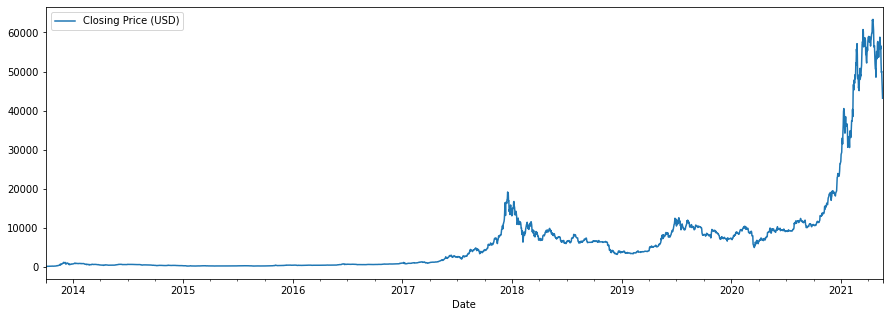

In [94]:
df = df1[['Closing Price (USD)']].copy().dropna()
df.plot(figsize=(15, 5));

In [95]:
df['1stdiff'] = df['Closing Price (USD)'].diff()

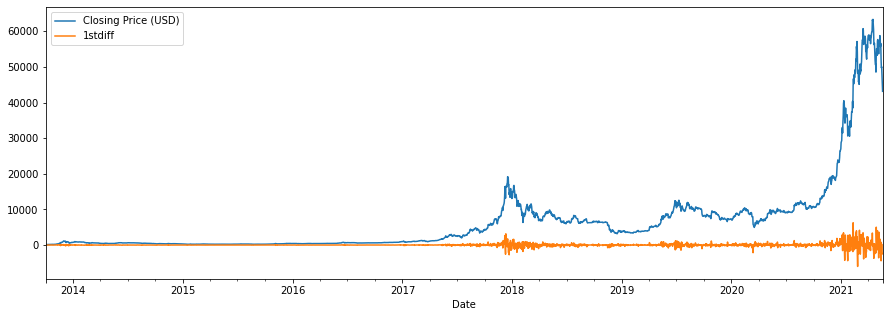

In [96]:
df.plot(figsize=(15, 5));

In [97]:
df['logClosingPrice(USD'] = np.log(df['Closing Price (USD)'])

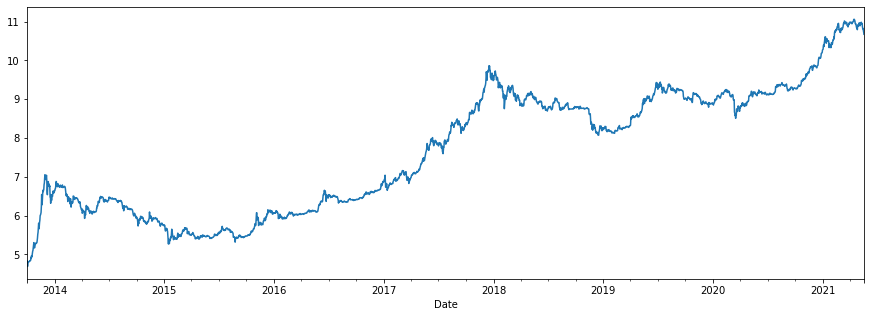

In [98]:
df['logClosingPrice(USD'].plot(figsize=(15, 5));

In [99]:
from statsmodels.tsa.arima.model import ARIMA

In [100]:
#df.index.freq = 'MS'

Ntest = 100
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [101]:
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

In [102]:
def plot_fit_and_forecast(result):
  fig, ax = plt.subplots(figsize=(15, 5))
  ax.plot(df['Closing Price (USD)'], label='data')

  # plot the curve fitted on train set
  train_pred = result.fittedvalues
  ax.plot(train.index, train_pred, color='green', label='fitted')

  # forecast the test set
  prediction_result = result.get_forecast(Ntest)
  conf_int = prediction_result.conf_int()
  lower, upper = conf_int['lower Closing Price (USD)'], conf_int['upper Closing Price (USD)']
  forecast = prediction_result.predicted_mean
  ax.plot(test.index, forecast, label='forecast')
  ax.fill_between(test.index, \
                  lower, upper, \
                  color='red', alpha=0.3)
  ax.legend()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Text(0.5, 1.0, 'order=(1,0,0) arima ')

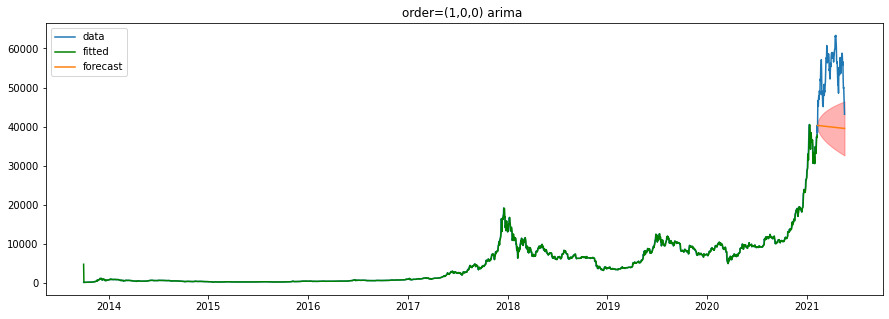

In [103]:
arima = ARIMA(train['Closing Price (USD)'], order=(1,0,0)) # AR(1)
arima_result = arima.fit()
plot_fit_and_forecast(arima_result)
plt.title('order=(1,0,0) arima ')

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Text(0.5, 1.0, 'order=(0,0,1) ')

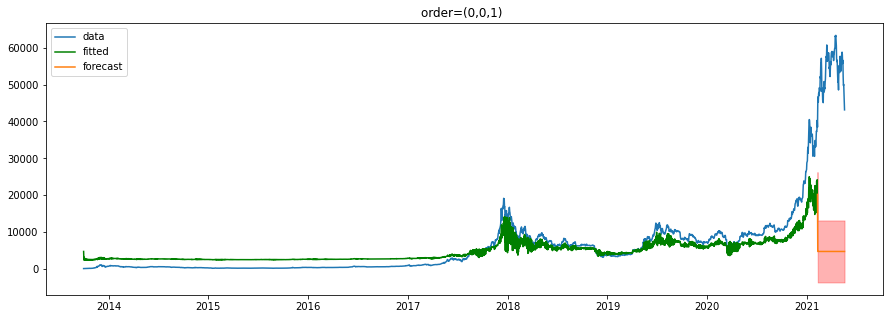

In [104]:
arima = ARIMA(train['Closing Price (USD)'], order=(0,0,1)) # MA(1)
arima_result = arima.fit()
plot_fit_and_forecast(arima_result)
plt.title('order=(0,0,1) ')

In [105]:
df['Log1stDiff'] = df['logClosingPrice(USD'].diff()

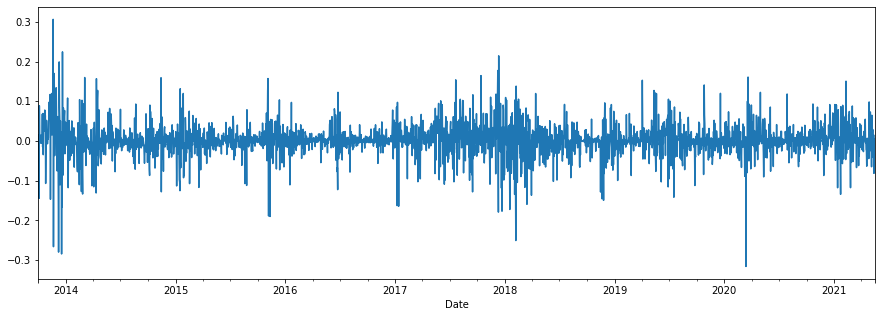

In [106]:
df['Log1stDiff'].plot(figsize=(15, 5));

In [107]:

def plot_fit_and_forecast_int(result, d, col='Closing Price (USD)'):
  fig, ax = plt.subplots(figsize=(15, 5))
  ax.plot(df[col], label='data')

  # plot the curve fitted on train set
  train_pred = result.predict(start=train.index[d], end=train.index[-1])

  ax.plot(train.index[d:], train_pred, color='green', label='fitted')

  # forecast the test set
  prediction_result = result.get_forecast(Ntest)
  conf_int = prediction_result.conf_int()
  lower, upper = conf_int[f'lower {col}'], conf_int[f'upper {col}']
  forecast = prediction_result.predicted_mean
  ax.plot(test.index, forecast, label='forecast')
  ax.fill_between(test.index, \
                  lower, upper, \
                  color='red', alpha=0.3)
  ax.legend()



/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Text(0.5, 1.0, 'order=(1,1,1) arima')

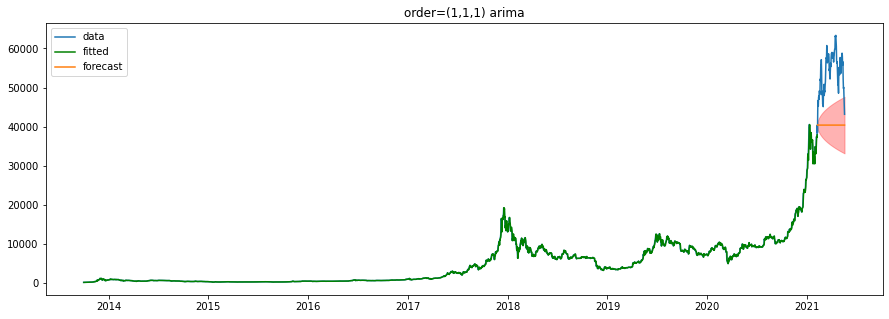

In [108]:
arima = ARIMA(train['Closing Price (USD)'], order=(1,1,1))
arima_result_1_1_1 = arima.fit()
plot_fit_and_forecast_int(arima_result_1_1_1, 1, col='Closing Price (USD)')
plt.title('order=(1,1,1) arima')

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Text(0.5, 1.0, 'order=(12,1,12) arima logged')

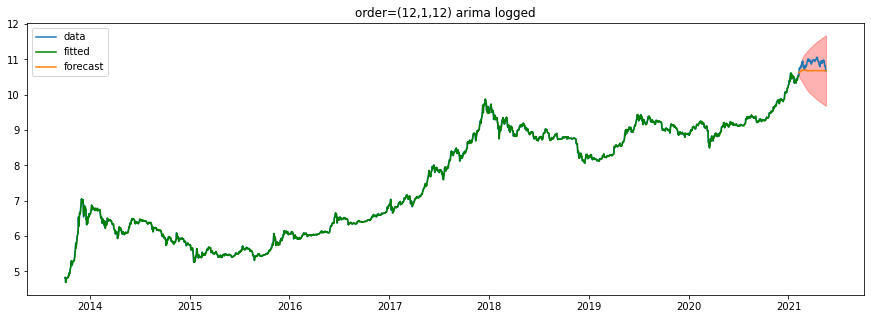

In [109]:
arima = ARIMA(train['logClosingPrice(USD'], order=(12,1,12))
arima_result_log12_1_12 = arima.fit()
plot_fit_and_forecast_int(arima_result_log12_1_12, 1, col='logClosingPrice(USD')
plt.title('order=(12,1,12) arima logged')

In [110]:
def rmse(result, is_logged):
  forecast = result.forecast(Ntest)
  if is_logged:
    forecast = np.exp(forecast)
  
  t = test['Closing Price (USD)']
  y = forecast
  return np.sqrt(np.mean((t - y)**2))

In [111]:
print("ARIMA(1,1,1):", rmse(arima_result_1_1_1, False))
print("ARIMA(12,1,12) logged:", rmse(arima_result_log12_1_12, True))

ARIMA(1,1,1): 14540.82731681076
ARIMA(12,1,12) logged: 11678.23269436023
